In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_rel_ood_perf
)

pd.options.display.max_rows = 100

In [2]:
train_years = [
    '2009_2010_2011_2012',
    '2010_2011_2012_2013',
    '2011_2012_2013_2014',
    '2012_2013_2014_2015',
    '2013_2014_2015_2016',
    '2014_2015_2016_2017',
    '2015_2016_2017_2018',
]

y_axis = {
    'auc':{
        'lim':[-0.3, 0.1],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.4, 0.1],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[-0.01, 0.1],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.4],
        'label':'BCE Loss'
    }
}
tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}
algos = {
    'erm':'ERM (Baseline)',
    'irm':'IRM',
    'dro':'GroupDRO',
    'coral':'CORAL', 
    'adversarial':'AL',
}
metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration'
}


#### ID Performance

In [3]:
for year in train_years:
    algos['erm'] = f'ERM[{year[2:4]}-{year[-2:]}]'
    algos['irm'] = f'IRM[{year[2:4]}-{year[-2:]}]'
    algos['dro'] = f'GroupDRO[{year[2:4]}-{year[-2:]}]'
    algos['coral'] = f'CORAL[{year[2:4]}-{year[-2:]}]'
    algos['adversarial'] = f'AL[{year[2:4]}-{year[-2:]}]'
    
    df = get_result_table(
        train_year=year,
        tasks=tasks,
        algos=algos,
        metrics=metrics,
    )
    
    print(f"ID Performance of {year[2:4]}-{year[-2:]} Models")
    display(df)

ID Performance of 09-12 Models


Algorithm                                     ERM[09-12]  \
Metric      Task                                           
AUROC       Admission to ICU        0.841 (0.822, 0.857)   
            In-Hospital Mortality    0.819 (0.79, 0.844)   
            LOS > 7 Days             0.753 (0.74, 0.765)   
            Readmission in 30 Days  0.768 (0.748, 0.788)   
AUPRC       Admission to ICU        0.379 (0.333, 0.426)   
            In-Hospital Mortality   0.096 (0.074, 0.123)   
            LOS > 7 Days             0.45 (0.424, 0.473)   
            Readmission in 30 Days  0.258 (0.223, 0.299)   
Calibration Admission to ICU         0.005 (0.002, 0.01)   
            In-Hospital Mortality   0.005 (0.003, 0.008)   
            LOS > 7 Days            0.008 (0.003, 0.015)   
            Readmission in 30 Days  0.007 (0.003, 0.011)   

Algorithm                                     IRM[09-12]  \
Metric      Task                                           
AUROC       Admission to ICU         0.84 (0.821, 0.855)   
            In-Hospital Mortality   0.819 (0.793, 0.841)   
            LOS > 7 Days            0.751 (0.739, 0.763)   
            Readmission in 30 Days  0.766 (0.744, 0.785)   
AUPRC       Admission to ICU        0.375 (0.327, 0.424)   
            In-Hospital Mortality   0.097 (0.075, 0.126)   
            LOS > 7 Days            0.449 (0.424, 0.472)   
            Readmission in 30 Days  0.254 (0.216, 0.291)   
Calibration Admission to ICU         0.006 (0.002, 0.01)   
            In-Hospital Mortality   0.009 (0.006, 0.011)   
            LOS > 7 Days            0.011 (0.005, 0.018)   
            Readmission in 30 Days  0.004 (0.003, 0.007)   

Algorithm                                GroupDRO[09-12]  \
Metric      Task                                           
AUROC       Admission to ICU         0.84 (0.823, 0.858)   
            In-Hospital Mortality   0.821 (0.794, 0.844)   
            LOS > 7 Days            0.753 (0.739, 0.766)   
            Readmission in 30 Days  0.769 (0.747, 0.789)   
AUPRC       Admission to ICU        0.377 (0.327, 0.426)   
            In-Hospital Mortality   0.097 (0.077, 0.124)   
            LOS > 7 Days            0.449 (0.424, 0.474)   
            Readmission in 30 Days  0.258 (0.221, 0.295)   
Calibration Admission to ICU        0.005 (0.002, 0.009)   
            In-Hospital Mortality   0.005 (0.003, 0.008)   
            LOS > 7 Days            0.009 (0.003, 0.015)   
            Readmission in 30 Days  0.007 (0.003, 0.011)   

Algorithm                                   CORAL[09-12]             AL[09-12]  
Metric      Task                                                                
AUROC       Admission to ICU        0.838 (0.819, 0.855)  0.842 (0.823, 0.859)  
            In-Hospital Mortality   0.823 (0.796, 0.848)  0.822 (0.795, 0.847)  
            LOS > 7 Days             0.753 (0.74, 0.765)  0.753 (0.741, 0.765)  
            Readmission in 30 Days  0.767 (0.746, 0.789)  0.769 (0.747, 0.791)  
AUPRC       Admission to ICU        0.389 (0.342, 0.439)  0.381 (0.332, 0.424)  
            In-Hospital Mortality     0.1 (0.079, 0.126)  0.097 (0.076, 0.122)  
            LOS > 7 Days             0.45 (0.424, 0.473)  0.451 (0.426, 0.476)  
            Readmission in 30 Days  0.258 (0.223, 0.294)  0.259 (0.226, 0.297)  
Calibration Admission to ICU        0.005 (0.002, 0.009)  0.003 (0.001, 0.006)  
            In-Hospital Mortality   0.004 (0.002, 0.006)  0.005 (0.002, 0.007)  
            LOS > 7 Days            0.008 (0.003, 0.015)   0.01 (0.004, 0.017)  
            Readmission in 30 Days  0.007 (0.004, 0.012)  0.007 (0.003, 0.012)

ID Performance of 10-13 Models


Algorithm                                     ERM[10-13]  \
Metric      Task                                           
AUROC       Admission to ICU        0.835 (0.818, 0.852)   
            In-Hospital Mortality   0.828 (0.804, 0.849)   
            LOS > 7 Days            0.755 (0.743, 0.768)   
            Readmission in 30 Days  0.766 (0.744, 0.788)   
AUPRC       Admission to ICU        0.396 (0.353, 0.437)   
            In-Hospital Mortality    0.11 (0.089, 0.135)   
            LOS > 7 Days            0.451 (0.426, 0.475)   
            Readmission in 30 Days  0.251 (0.218, 0.293)   
Calibration Admission to ICU        0.006 (0.002, 0.011)   
            In-Hospital Mortality   0.003 (0.002, 0.005)   
            LOS > 7 Days            0.009 (0.004, 0.015)   
            Readmission in 30 Days   0.005 (0.002, 0.01)   

Algorithm                                     IRM[10-13]  \
Metric      Task                                           
AUROC       Admission to ICU        0.834 (0.817, 0.852)   
            In-Hospital Mortality   0.833 (0.809, 0.855)   
            LOS > 7 Days            0.756 (0.744, 0.769)   
            Readmission in 30 Days  0.766 (0.745, 0.788)   
AUPRC       Admission to ICU        0.393 (0.353, 0.437)   
            In-Hospital Mortality   0.116 (0.091, 0.148)   
            LOS > 7 Days            0.451 (0.428, 0.476)   
            Readmission in 30 Days    0.25 (0.218, 0.29)   
Calibration Admission to ICU        0.007 (0.002, 0.011)   
            In-Hospital Mortality   0.003 (0.002, 0.005)   
            LOS > 7 Days            0.011 (0.005, 0.018)   
            Readmission in 30 Days  0.005 (0.002, 0.009)   

Algorithm                                GroupDRO[10-13]  \
Metric      Task                                           
AUROC       Admission to ICU        0.835 (0.818, 0.853)   
            In-Hospital Mortality   0.831 (0.808, 0.851)   
            LOS > 7 Days            0.755 (0.743, 0.767)   
            Readmission in 30 Days  0.765 (0.741, 0.787)   
AUPRC       Admission to ICU         0.396 (0.354, 0.44)   
            In-Hospital Mortality   0.113 (0.089, 0.142)   
            LOS > 7 Days            0.449 (0.425, 0.473)   
            Readmission in 30 Days   0.253 (0.215, 0.29)   
Calibration Admission to ICU        0.007 (0.003, 0.012)   
            In-Hospital Mortality   0.003 (0.002, 0.005)   
            LOS > 7 Days            0.006 (0.002, 0.013)   
            Readmission in 30 Days   0.006 (0.002, 0.01)   

Algorithm                                   CORAL[10-13]             AL[10-13]  
Metric      Task                                                                
AUROC       Admission to ICU        0.833 (0.816, 0.851)  0.835 (0.818, 0.851)  
            In-Hospital Mortality   0.835 (0.812, 0.857)    0.831 (0.81, 0.85)  
            LOS > 7 Days            0.756 (0.744, 0.769)  0.755 (0.743, 0.767)  
            Readmission in 30 Days  0.765 (0.743, 0.788)  0.767 (0.745, 0.789)  
AUPRC       Admission to ICU        0.403 (0.359, 0.443)   0.396 (0.355, 0.44)  
            In-Hospital Mortality   0.116 (0.094, 0.144)  0.115 (0.091, 0.144)  
            LOS > 7 Days            0.451 (0.428, 0.478)  0.451 (0.427, 0.475)  
            Readmission in 30 Days  0.256 (0.221, 0.294)  0.253 (0.214, 0.291)  
Calibration Admission to ICU        0.004 (0.002, 0.008)  0.007 (0.002, 0.011)  
            In-Hospital Mortality   0.004 (0.002, 0.006)  0.004 (0.003, 0.005)  
            LOS > 7 Days            0.009 (0.004, 0.015)   0.01 (0.004, 0.017)  
            Readmission in 30 Days  0.008 (0.004, 0.012)   0.006 (0.004, 0.01)

ID Performance of 11-14 Models


Algorithm                                     ERM[11-14]  \
Metric      Task                                           
AUROC       Admission to ICU        0.842 (0.826, 0.858)   
            In-Hospital Mortality    0.814 (0.79, 0.838)   
            LOS > 7 Days             0.771 (0.76, 0.783)   
            Readmission in 30 Days   0.757 (0.734, 0.78)   
AUPRC       Admission to ICU        0.401 (0.358, 0.443)   
            In-Hospital Mortality   0.098 (0.076, 0.124)   
            LOS > 7 Days            0.459 (0.438, 0.485)   
            Readmission in 30 Days  0.239 (0.203, 0.279)   
Calibration Admission to ICU        0.008 (0.004, 0.013)   
            In-Hospital Mortality   0.005 (0.002, 0.007)   
            LOS > 7 Days            0.007 (0.003, 0.014)   
            Readmission in 30 Days  0.006 (0.002, 0.009)   

Algorithm                                     IRM[11-14]  \
Metric      Task                                           
AUROC       Admission to ICU        0.843 (0.825, 0.857)   
            In-Hospital Mortality     0.816 (0.79, 0.84)   
            LOS > 7 Days            0.772 (0.761, 0.784)   
            Readmission in 30 Days   0.754 (0.73, 0.777)   
AUPRC       Admission to ICU        0.401 (0.361, 0.439)   
            In-Hospital Mortality      0.1 (0.079, 0.13)   
            LOS > 7 Days            0.459 (0.435, 0.482)   
            Readmission in 30 Days    0.234 (0.2, 0.276)   
Calibration Admission to ICU        0.009 (0.005, 0.013)   
            In-Hospital Mortality   0.005 (0.002, 0.007)   
            LOS > 7 Days            0.008 (0.003, 0.015)   
            Readmission in 30 Days  0.005 (0.003, 0.008)   

Algorithm                                GroupDRO[11-14]  \
Metric      Task                                           
AUROC       Admission to ICU        0.844 (0.827, 0.859)   
            In-Hospital Mortality   0.818 (0.789, 0.843)   
            LOS > 7 Days            0.771 (0.759, 0.783)   
            Readmission in 30 Days  0.757 (0.735, 0.781)   
AUPRC       Admission to ICU        0.405 (0.365, 0.451)   
            In-Hospital Mortality   0.101 (0.078, 0.134)   
            LOS > 7 Days             0.46 (0.436, 0.483)   
            Readmission in 30 Days     0.24 (0.2, 0.278)   
Calibration Admission to ICU        0.009 (0.004, 0.013)   
            In-Hospital Mortality   0.004 (0.002, 0.007)   
            LOS > 7 Days            0.008 (0.003, 0.014)   
            Readmission in 30 Days   0.006 (0.003, 0.01)   

Algorithm                                   CORAL[11-14]             AL[11-14]  
Metric      Task                                                                
AUROC       Admission to ICU        0.842 (0.824, 0.858)  0.842 (0.826, 0.858)  
            In-Hospital Mortality   0.819 (0.793, 0.842)   0.816 (0.789, 0.84)  
            LOS > 7 Days            0.771 (0.759, 0.784)   0.772 (0.76, 0.782)  
            Readmission in 30 Days  0.757 (0.735, 0.779)  0.755 (0.732, 0.778)  
AUPRC       Admission to ICU         0.41 (0.369, 0.449)  0.402 (0.359, 0.444)  
            In-Hospital Mortality   0.101 (0.078, 0.128)  0.098 (0.078, 0.123)  
            LOS > 7 Days             0.46 (0.435, 0.485)  0.459 (0.436, 0.482)  
            Readmission in 30 Days  0.234 (0.199, 0.273)  0.232 (0.198, 0.271)  
Calibration Admission to ICU         0.006 (0.003, 0.01)  0.009 (0.005, 0.014)  
            In-Hospital Mortality   0.003 (0.002, 0.005)  0.005 (0.002, 0.007)  
            LOS > 7 Days            0.008 (0.003, 0.014)  0.007 (0.003, 0.013)  
            Readmission in 30 Days  0.003 (0.002, 0.007)  0.004 (0.002, 0.008)

ID Performance of 12-15 Models


Algorithm                                     ERM[12-15]  \
Metric      Task                                           
AUROC       Admission to ICU        0.842 (0.825, 0.859)   
            In-Hospital Mortality   0.811 (0.786, 0.833)   
            LOS > 7 Days            0.781 (0.769, 0.792)   
            Readmission in 30 Days  0.778 (0.756, 0.799)   
AUPRC       Admission to ICU        0.389 (0.351, 0.429)   
            In-Hospital Mortality   0.094 (0.072, 0.123)   
            LOS > 7 Days            0.452 (0.429, 0.474)   
            Readmission in 30 Days  0.242 (0.204, 0.279)   
Calibration Admission to ICU        0.009 (0.005, 0.013)   
            In-Hospital Mortality   0.004 (0.002, 0.006)   
            LOS > 7 Days            0.006 (0.003, 0.011)   
            Readmission in 30 Days  0.004 (0.002, 0.008)   

Algorithm                                     IRM[12-15]  \
Metric      Task                                           
AUROC       Admission to ICU        0.842 (0.827, 0.857)   
            In-Hospital Mortality    0.81 (0.786, 0.833)   
            LOS > 7 Days            0.781 (0.769, 0.792)   
            Readmission in 30 Days  0.776 (0.754, 0.797)   
AUPRC       Admission to ICU         0.388 (0.351, 0.43)   
            In-Hospital Mortality   0.091 (0.069, 0.124)   
            LOS > 7 Days             0.45 (0.428, 0.472)   
            Readmission in 30 Days  0.238 (0.204, 0.276)   
Calibration Admission to ICU         0.01 (0.006, 0.014)   
            In-Hospital Mortality   0.005 (0.003, 0.007)   
            LOS > 7 Days            0.008 (0.003, 0.014)   
            Readmission in 30 Days  0.004 (0.002, 0.007)   

Algorithm                                GroupDRO[12-15]  \
Metric      Task                                           
AUROC       Admission to ICU        0.843 (0.828, 0.858)   
            In-Hospital Mortality    0.81 (0.786, 0.833)   
            LOS > 7 Days             0.78 (0.769, 0.792)   
            Readmission in 30 Days  0.777 (0.757, 0.798)   
AUPRC       Admission to ICU         0.391 (0.351, 0.43)   
            In-Hospital Mortality    0.092 (0.07, 0.122)   
            LOS > 7 Days            0.452 (0.428, 0.473)   
            Readmission in 30 Days   0.24 (0.204, 0.276)   
Calibration Admission to ICU        0.011 (0.007, 0.015)   
            In-Hospital Mortality   0.004 (0.002, 0.006)   
            LOS > 7 Days             0.005 (0.001, 0.01)   
            Readmission in 30 Days  0.004 (0.002, 0.007)   

Algorithm                                   CORAL[12-15]             AL[12-15]  
Metric      Task                                                                
AUROC       Admission to ICU        0.838 (0.822, 0.855)  0.842 (0.827, 0.858)  
            In-Hospital Mortality    0.81 (0.785, 0.835)   0.81 (0.786, 0.835)  
            LOS > 7 Days            0.782 (0.771, 0.792)   0.78 (0.769, 0.792)  
            Readmission in 30 Days  0.778 (0.755, 0.799)  0.777 (0.756, 0.798)  
AUPRC       Admission to ICU        0.389 (0.346, 0.429)  0.388 (0.349, 0.427)  
            In-Hospital Mortality    0.092 (0.069, 0.12)  0.092 (0.071, 0.121)  
            LOS > 7 Days            0.452 (0.427, 0.477)   0.45 (0.426, 0.474)  
            Readmission in 30 Days  0.241 (0.207, 0.278)   0.24 (0.207, 0.276)  
Calibration Admission to ICU        0.008 (0.004, 0.011)  0.009 (0.005, 0.013)  
            In-Hospital Mortality   0.003 (0.001, 0.005)  0.003 (0.002, 0.005)  
            LOS > 7 Days            0.006 (0.003, 0.012)  0.008 (0.003, 0.014)  
            Readmission in 30 Days  0.005 (0.002, 0.008)  0.004 (0.002, 0.008)

ID Performance of 13-16 Models


Algorithm                                     ERM[13-16]  \
Metric      Task                                           
AUROC       Admission to ICU        0.859 (0.844, 0.873)   
            In-Hospital Mortality   0.831 (0.808, 0.851)   
            LOS > 7 Days               0.79 (0.779, 0.8)   
            Readmission in 30 Days  0.783 (0.762, 0.803)   
AUPRC       Admission to ICU        0.415 (0.377, 0.454)   
            In-Hospital Mortality     0.109 (0.08, 0.14)   
            LOS > 7 Days             0.457 (0.434, 0.48)   
            Readmission in 30 Days    0.225 (0.19, 0.26)   
Calibration Admission to ICU        0.004 (0.001, 0.008)   
            In-Hospital Mortality   0.005 (0.004, 0.007)   
            LOS > 7 Days            0.006 (0.002, 0.011)   
            Readmission in 30 Days  0.005 (0.002, 0.008)   

Algorithm                                     IRM[13-16]  \
Metric      Task                                           
AUROC       Admission to ICU        0.858 (0.842, 0.871)   
            In-Hospital Mortality    0.83 (0.808, 0.851)   
            LOS > 7 Days              0.789 (0.779, 0.8)   
            Readmission in 30 Days  0.784 (0.764, 0.803)   
AUPRC       Admission to ICU        0.414 (0.373, 0.454)   
            In-Hospital Mortality   0.104 (0.079, 0.133)   
            LOS > 7 Days            0.458 (0.436, 0.479)   
            Readmission in 30 Days  0.227 (0.192, 0.263)   
Calibration Admission to ICU        0.004 (0.002, 0.008)   
            In-Hospital Mortality   0.005 (0.003, 0.007)   
            LOS > 7 Days            0.008 (0.004, 0.013)   
            Readmission in 30 Days  0.005 (0.002, 0.008)   

Algorithm                                GroupDRO[13-16]  \
Metric      Task                                           
AUROC       Admission to ICU        0.859 (0.844, 0.873)   
            In-Hospital Mortality   0.832 (0.808, 0.853)   
            LOS > 7 Days               0.79 (0.779, 0.8)   
            Readmission in 30 Days  0.783 (0.764, 0.803)   
AUPRC       Admission to ICU        0.417 (0.376, 0.456)   
            In-Hospital Mortality   0.106 (0.082, 0.138)   
            LOS > 7 Days             0.457 (0.434, 0.48)   
            Readmission in 30 Days  0.224 (0.191, 0.261)   
Calibration Admission to ICU         0.006 (0.002, 0.01)   
            In-Hospital Mortality   0.005 (0.003, 0.007)   
            LOS > 7 Days            0.007 (0.003, 0.012)   
            Readmission in 30 Days  0.005 (0.002, 0.008)   

Algorithm                                   CORAL[13-16]             AL[13-16]  
Metric      Task                                                                
AUROC       Admission to ICU        0.852 (0.837, 0.869)  0.858 (0.843, 0.872)  
            In-Hospital Mortality   0.832 (0.811, 0.854)  0.826 (0.802, 0.851)  
            LOS > 7 Days              0.789 (0.778, 0.8)     0.79 (0.779, 0.8)  
            Readmission in 30 Days  0.784 (0.765, 0.804)  0.784 (0.765, 0.805)  
AUPRC       Admission to ICU        0.415 (0.377, 0.456)  0.415 (0.374, 0.452)  
            In-Hospital Mortality    0.104 (0.08, 0.135)    0.11 (0.08, 0.147)  
            LOS > 7 Days             0.456 (0.434, 0.48)  0.458 (0.434, 0.481)  
            Readmission in 30 Days  0.226 (0.191, 0.261)   0.23 (0.196, 0.265)  
Calibration Admission to ICU        0.005 (0.002, 0.008)  0.005 (0.001, 0.008)  
            In-Hospital Mortality   0.004 (0.003, 0.006)  0.005 (0.003, 0.007)  
            LOS > 7 Days            0.006 (0.002, 0.012)  0.007 (0.002, 0.012)  
            Readmission in 30 Days  0.005 (0.002, 0.007)  0.005 (0.002, 0.008)

ID Performance of 14-17 Models


Algorithm                                     ERM[14-17]  \
Metric      Task                                           
AUROC       Admission to ICU         0.873 (0.86, 0.885)   
            In-Hospital Mortality   0.833 (0.811, 0.853)   
            LOS > 7 Days            0.798 (0.787, 0.807)   
            Readmission in 30 Days  0.798 (0.779, 0.815)   
AUPRC       Admission to ICU        0.428 (0.385, 0.465)   
            In-Hospital Mortality   0.104 (0.079, 0.133)   
            LOS > 7 Days            0.455 (0.433, 0.478)   
            Readmission in 30 Days  0.237 (0.204, 0.276)   
Calibration Admission to ICU        0.003 (0.001, 0.006)   
            In-Hospital Mortality   0.003 (0.001, 0.004)   
            LOS > 7 Days             0.01 (0.005, 0.015)   
            Readmission in 30 Days  0.005 (0.002, 0.008)   

Algorithm                                     IRM[14-17]  \
Metric      Task                                           
AUROC       Admission to ICU        0.872 (0.858, 0.885)   
            In-Hospital Mortality    0.83 (0.809, 0.851)   
            LOS > 7 Days            0.797 (0.787, 0.808)   
            Readmission in 30 Days  0.797 (0.778, 0.815)   
AUPRC       Admission to ICU        0.426 (0.388, 0.466)   
            In-Hospital Mortality   0.101 (0.077, 0.131)   
            LOS > 7 Days            0.456 (0.435, 0.478)   
            Readmission in 30 Days    0.236 (0.2, 0.275)   
Calibration Admission to ICU        0.003 (0.001, 0.007)   
            In-Hospital Mortality   0.004 (0.002, 0.006)   
            LOS > 7 Days            0.007 (0.003, 0.012)   
            Readmission in 30 Days  0.005 (0.003, 0.007)   

Algorithm                                GroupDRO[14-17]  \
Metric      Task                                           
AUROC       Admission to ICU         0.873 (0.86, 0.885)   
            In-Hospital Mortality    0.833 (0.81, 0.853)   
            LOS > 7 Days            0.798 (0.787, 0.808)   
            Readmission in 30 Days  0.797 (0.778, 0.815)   
AUPRC       Admission to ICU          0.43 (0.39, 0.468)   
            In-Hospital Mortality    0.103 (0.08, 0.133)   
            LOS > 7 Days            0.455 (0.432, 0.477)   
            Readmission in 30 Days  0.231 (0.199, 0.264)   
Calibration Admission to ICU        0.003 (0.001, 0.006)   
            In-Hospital Mortality   0.003 (0.001, 0.004)   
            LOS > 7 Days             0.01 (0.005, 0.015)   
            Readmission in 30 Days  0.005 (0.002, 0.008)   

Algorithm                                   CORAL[14-17]             AL[14-17]  
Metric      Task                                                                
AUROC       Admission to ICU        0.874 (0.861, 0.888)  0.873 (0.859, 0.885)  
            In-Hospital Mortality   0.832 (0.809, 0.856)   0.833 (0.81, 0.856)  
            LOS > 7 Days            0.798 (0.788, 0.807)  0.798 (0.788, 0.808)  
            Readmission in 30 Days  0.797 (0.778, 0.815)  0.797 (0.778, 0.816)  
AUPRC       Admission to ICU         0.429 (0.39, 0.469)  0.426 (0.389, 0.468)  
            In-Hospital Mortality   0.108 (0.082, 0.144)  0.103 (0.079, 0.136)  
            LOS > 7 Days            0.456 (0.432, 0.477)  0.457 (0.434, 0.481)  
            Readmission in 30 Days  0.235 (0.197, 0.273)  0.235 (0.202, 0.274)  
Calibration Admission to ICU        0.003 (0.001, 0.006)  0.003 (0.001, 0.006)  
            In-Hospital Mortality   0.002 (0.001, 0.004)  0.003 (0.002, 0.005)  
            LOS > 7 Days             0.01 (0.005, 0.015)   0.01 (0.005, 0.015)  
            Readmission in 30 Days  0.003 (0.001, 0.006)  0.004 (0.002, 0.007)

ID Performance of 15-18 Models


Algorithm                                     ERM[15-18]  \
Metric      Task                                           
AUROC       Admission to ICU        0.874 (0.863, 0.885)   
            In-Hospital Mortality   0.839 (0.817, 0.861)   
            LOS > 7 Days             0.801 (0.791, 0.81)   
            Readmission in 30 Days  0.802 (0.785, 0.818)   
AUPRC       Admission to ICU        0.404 (0.368, 0.438)   
            In-Hospital Mortality   0.126 (0.096, 0.161)   
            LOS > 7 Days            0.474 (0.453, 0.497)   
            Readmission in 30 Days  0.248 (0.213, 0.287)   
Calibration Admission to ICU        0.002 (0.001, 0.005)   
            In-Hospital Mortality   0.003 (0.002, 0.005)   
            LOS > 7 Days            0.005 (0.002, 0.009)   
            Readmission in 30 Days  0.003 (0.002, 0.006)   

Algorithm                                     IRM[15-18]  \
Metric      Task                                           
AUROC       Admission to ICU        0.874 (0.862, 0.886)   
            In-Hospital Mortality    0.84 (0.816, 0.861)   
            LOS > 7 Days              0.801 (0.79, 0.81)   
            Readmission in 30 Days   0.803 (0.785, 0.82)   
AUPRC       Admission to ICU        0.404 (0.368, 0.439)   
            In-Hospital Mortality   0.118 (0.093, 0.149)   
            LOS > 7 Days            0.474 (0.452, 0.496)   
            Readmission in 30 Days   0.25 (0.215, 0.286)   
Calibration Admission to ICU        0.003 (0.001, 0.006)   
            In-Hospital Mortality   0.003 (0.001, 0.005)   
            LOS > 7 Days            0.005 (0.003, 0.009)   
            Readmission in 30 Days  0.003 (0.001, 0.006)   

Algorithm                                GroupDRO[15-18]  \
Metric      Task                                           
AUROC       Admission to ICU        0.874 (0.863, 0.885)   
            In-Hospital Mortality    0.84 (0.817, 0.861)   
            LOS > 7 Days               0.8 (0.791, 0.81)   
            Readmission in 30 Days  0.802 (0.782, 0.819)   
AUPRC       Admission to ICU        0.403 (0.367, 0.441)   
            In-Hospital Mortality    0.125 (0.098, 0.16)   
            LOS > 7 Days            0.474 (0.452, 0.496)   
            Readmission in 30 Days  0.251 (0.214, 0.288)   
Calibration Admission to ICU        0.002 (0.001, 0.005)   
            In-Hospital Mortality   0.003 (0.002, 0.005)   
            LOS > 7 Days             0.005 (0.002, 0.01)   
            Readmission in 30 Days  0.004 (0.002, 0.006)   

Algorithm                                   CORAL[15-18]             AL[15-18]  
Metric      Task                                                                
AUROC       Admission to ICU         0.879 (0.867, 0.89)  0.874 (0.863, 0.886)  
            In-Hospital Mortality   0.841 (0.817, 0.863)  0.839 (0.816, 0.861)  
            LOS > 7 Days              0.8 (0.791, 0.811)     0.8 (0.79, 0.809)  
            Readmission in 30 Days  0.803 (0.783, 0.821)   0.803 (0.785, 0.82)  
AUPRC       Admission to ICU        0.411 (0.375, 0.451)   0.407 (0.37, 0.442)  
            In-Hospital Mortality   0.123 (0.094, 0.156)  0.121 (0.095, 0.152)  
            LOS > 7 Days            0.474 (0.453, 0.498)  0.474 (0.453, 0.497)  
            Readmission in 30 Days  0.249 (0.215, 0.286)    0.25 (0.214, 0.29)  
Calibration Admission to ICU        0.005 (0.002, 0.008)  0.003 (0.001, 0.006)  
            In-Hospital Mortality   0.004 (0.002, 0.006)  0.003 (0.002, 0.005)  
            LOS > 7 Days             0.005 (0.002, 0.01)  0.004 (0.002, 0.008)  
            Readmission in 30 Days  0.002 (0.001, 0.005)  0.003 (0.002, 0.006)

#### OOD Performance

Out-of-Distribution Results of ERM[09-12] and DG[09-12] algorithms


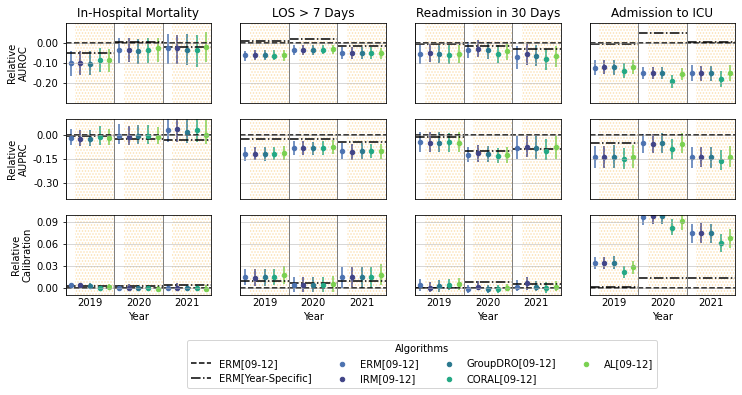

Out-of-Distribution Results of ERM[10-13] and DG[10-13] algorithms


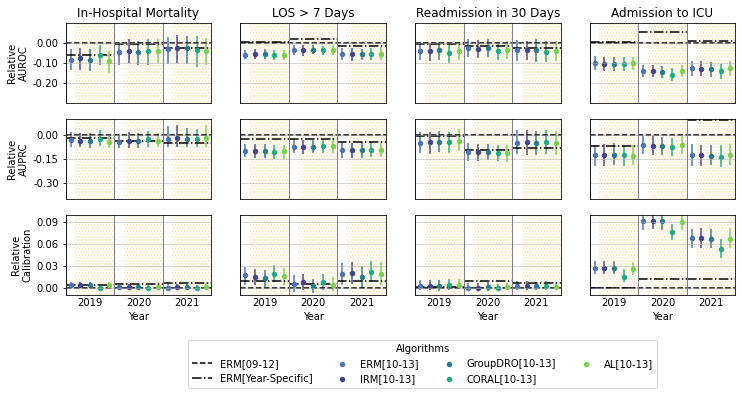

Out-of-Distribution Results of ERM[11-14] and DG[11-14] algorithms


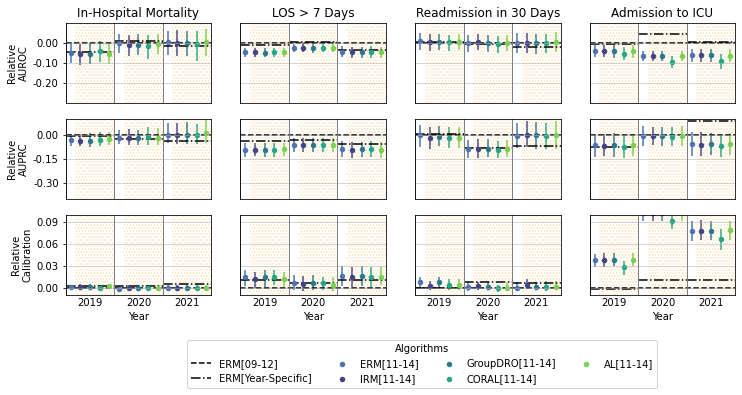

Out-of-Distribution Results of ERM[12-15] and DG[12-15] algorithms


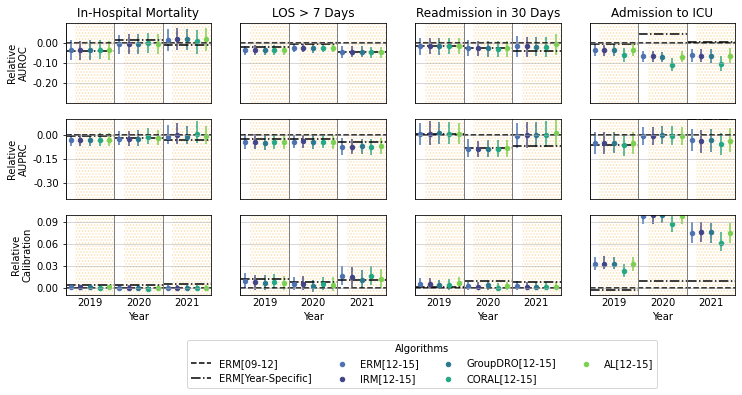

Out-of-Distribution Results of ERM[13-16] and DG[13-16] algorithms


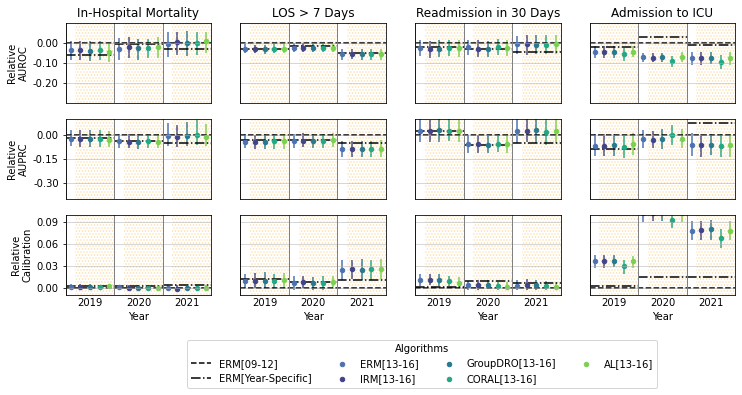

Out-of-Distribution Results of ERM[14-17] and DG[14-17] algorithms


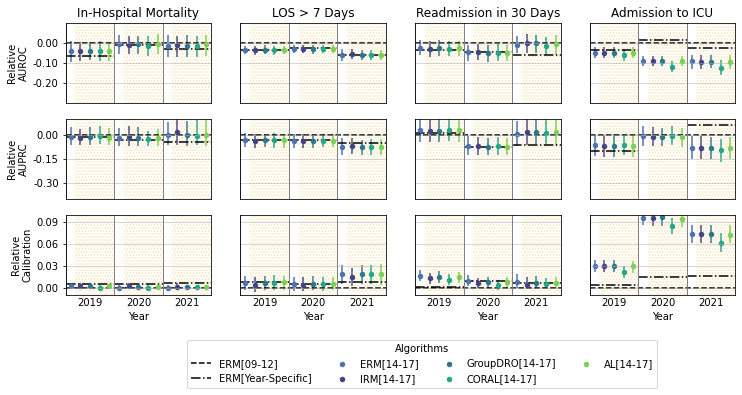

Out-of-Distribution Results of ERM[15-18] and DG[15-18] algorithms


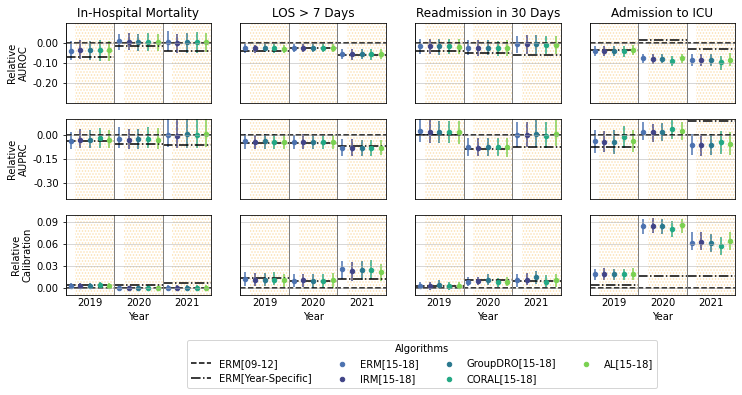

In [4]:
for year in train_years:
    
    algos['erm'] = f'ERM[{year[2:4]}-{year[-2:]}]'
    algos['irm'] = f'IRM[{year[2:4]}-{year[-2:]}]'
    algos['dro'] = f'GroupDRO[{year[2:4]}-{year[-2:]}]'
    algos['coral'] = f'CORAL[{year[2:4]}-{year[-2:]}]'
    algos['adversarial'] = f'AL[{year[2:4]}-{year[-2:]}]'
    
    print(f'Out-of-Distribution Results of ERM[{year[2:4]}-{year[-2:]}] and DG[{year[2:4]}-{year[-2:]}] algorithms')
    
    plot_rel_ood_perf(
        train_year=year,
        tasks=tasks,
        metrics=metrics,
        algos=algos,
        y_axis=y_axis,
        legend_ncols=4
    )